In [1]:
pip install adjustText


<ipython-input-4-d9f897628906>:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


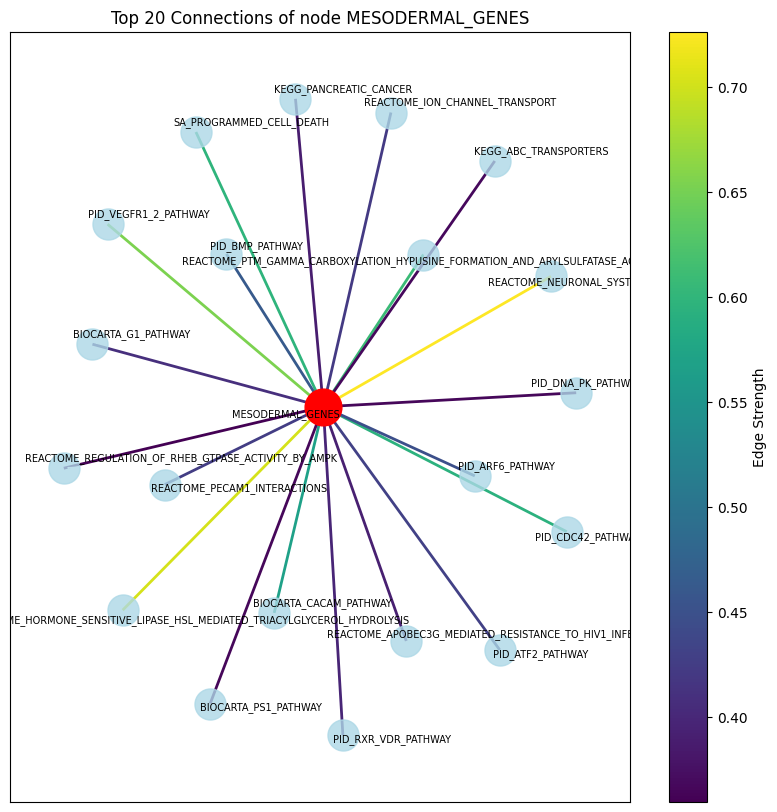

In [ ]:
  import networkx as nx
  import matplotlib.pyplot as plt
  import pandas as pd
  from adjustText import adjust_text

  # Load the data
  df = pd.read_csv("/content/unique_bay_main2.csv")
  G = nx.from_pandas_edgelist(df, source='from', target='to', edge_attr='strength')

  plt.figure(figsize=(10, 10))

  # Choose the node to focus on
  focus_node = 'MESODERMAL_GENES'

  # Get all nodes directly connected to the focus node with their edge strengths
  edges = [(focus_node, neighbor, G[focus_node][neighbor]['strength']) for neighbor in G.neighbors(focus_node)]

  # Sort edges by strength and keep only the top 20
  top_edges = sorted(edges, key=lambda x: x[2], reverse=True)[:20]

  # Extract the top 20 neighbors
  top_neighbors = [edge[1] for edge in top_edges]

  # Create a subgraph containing the focus node and its top 20 neighbors
  subgraph = nx.Graph()
  subgraph.add_node(focus_node)
  for edge in top_edges:
      subgraph.add_edge(edge[0], edge[1], strength=edge[2])

  # Use spring layout for positions
  pos = nx.spring_layout(subgraph, seed=42)

  # Draw nodes
  nx.draw_networkx_nodes(subgraph, pos, node_color='lightblue', node_size=500, alpha=0.8)
  nx.draw_networkx_nodes(subgraph, pos, nodelist=[focus_node], node_color='red', node_size=700, alpha=1.0)

  # Draw edges with edge colors based on strength
  edge_colors = [subgraph[u][v]['strength'] for u, v in subgraph.edges()]
  nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), edge_color=edge_colors, edge_cmap=plt.cm.viridis, width=2)

  # Draw labels and adjust positions to avoid overlap
  labels = nx.draw_networkx_labels(subgraph, pos, font_size=7, font_family='sans-serif')
  texts = [labels[node] for node in labels]

  adjust_text(texts, arrowprops=dict(arrowstyle='->', color='white'))

  # Add color bar
  sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
  sm.set_array([])
  cbar = plt.colorbar(sm)
  cbar.set_label('Edge Strength')

  plt.title(f"Top 20 Connections of node {focus_node}")

  # Save the plot as an image file
  plt.savefig("graph_plot_top_20.png", format="png")
  plt.show()

<ipython-input-2-1b16751e1c9b>:66: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


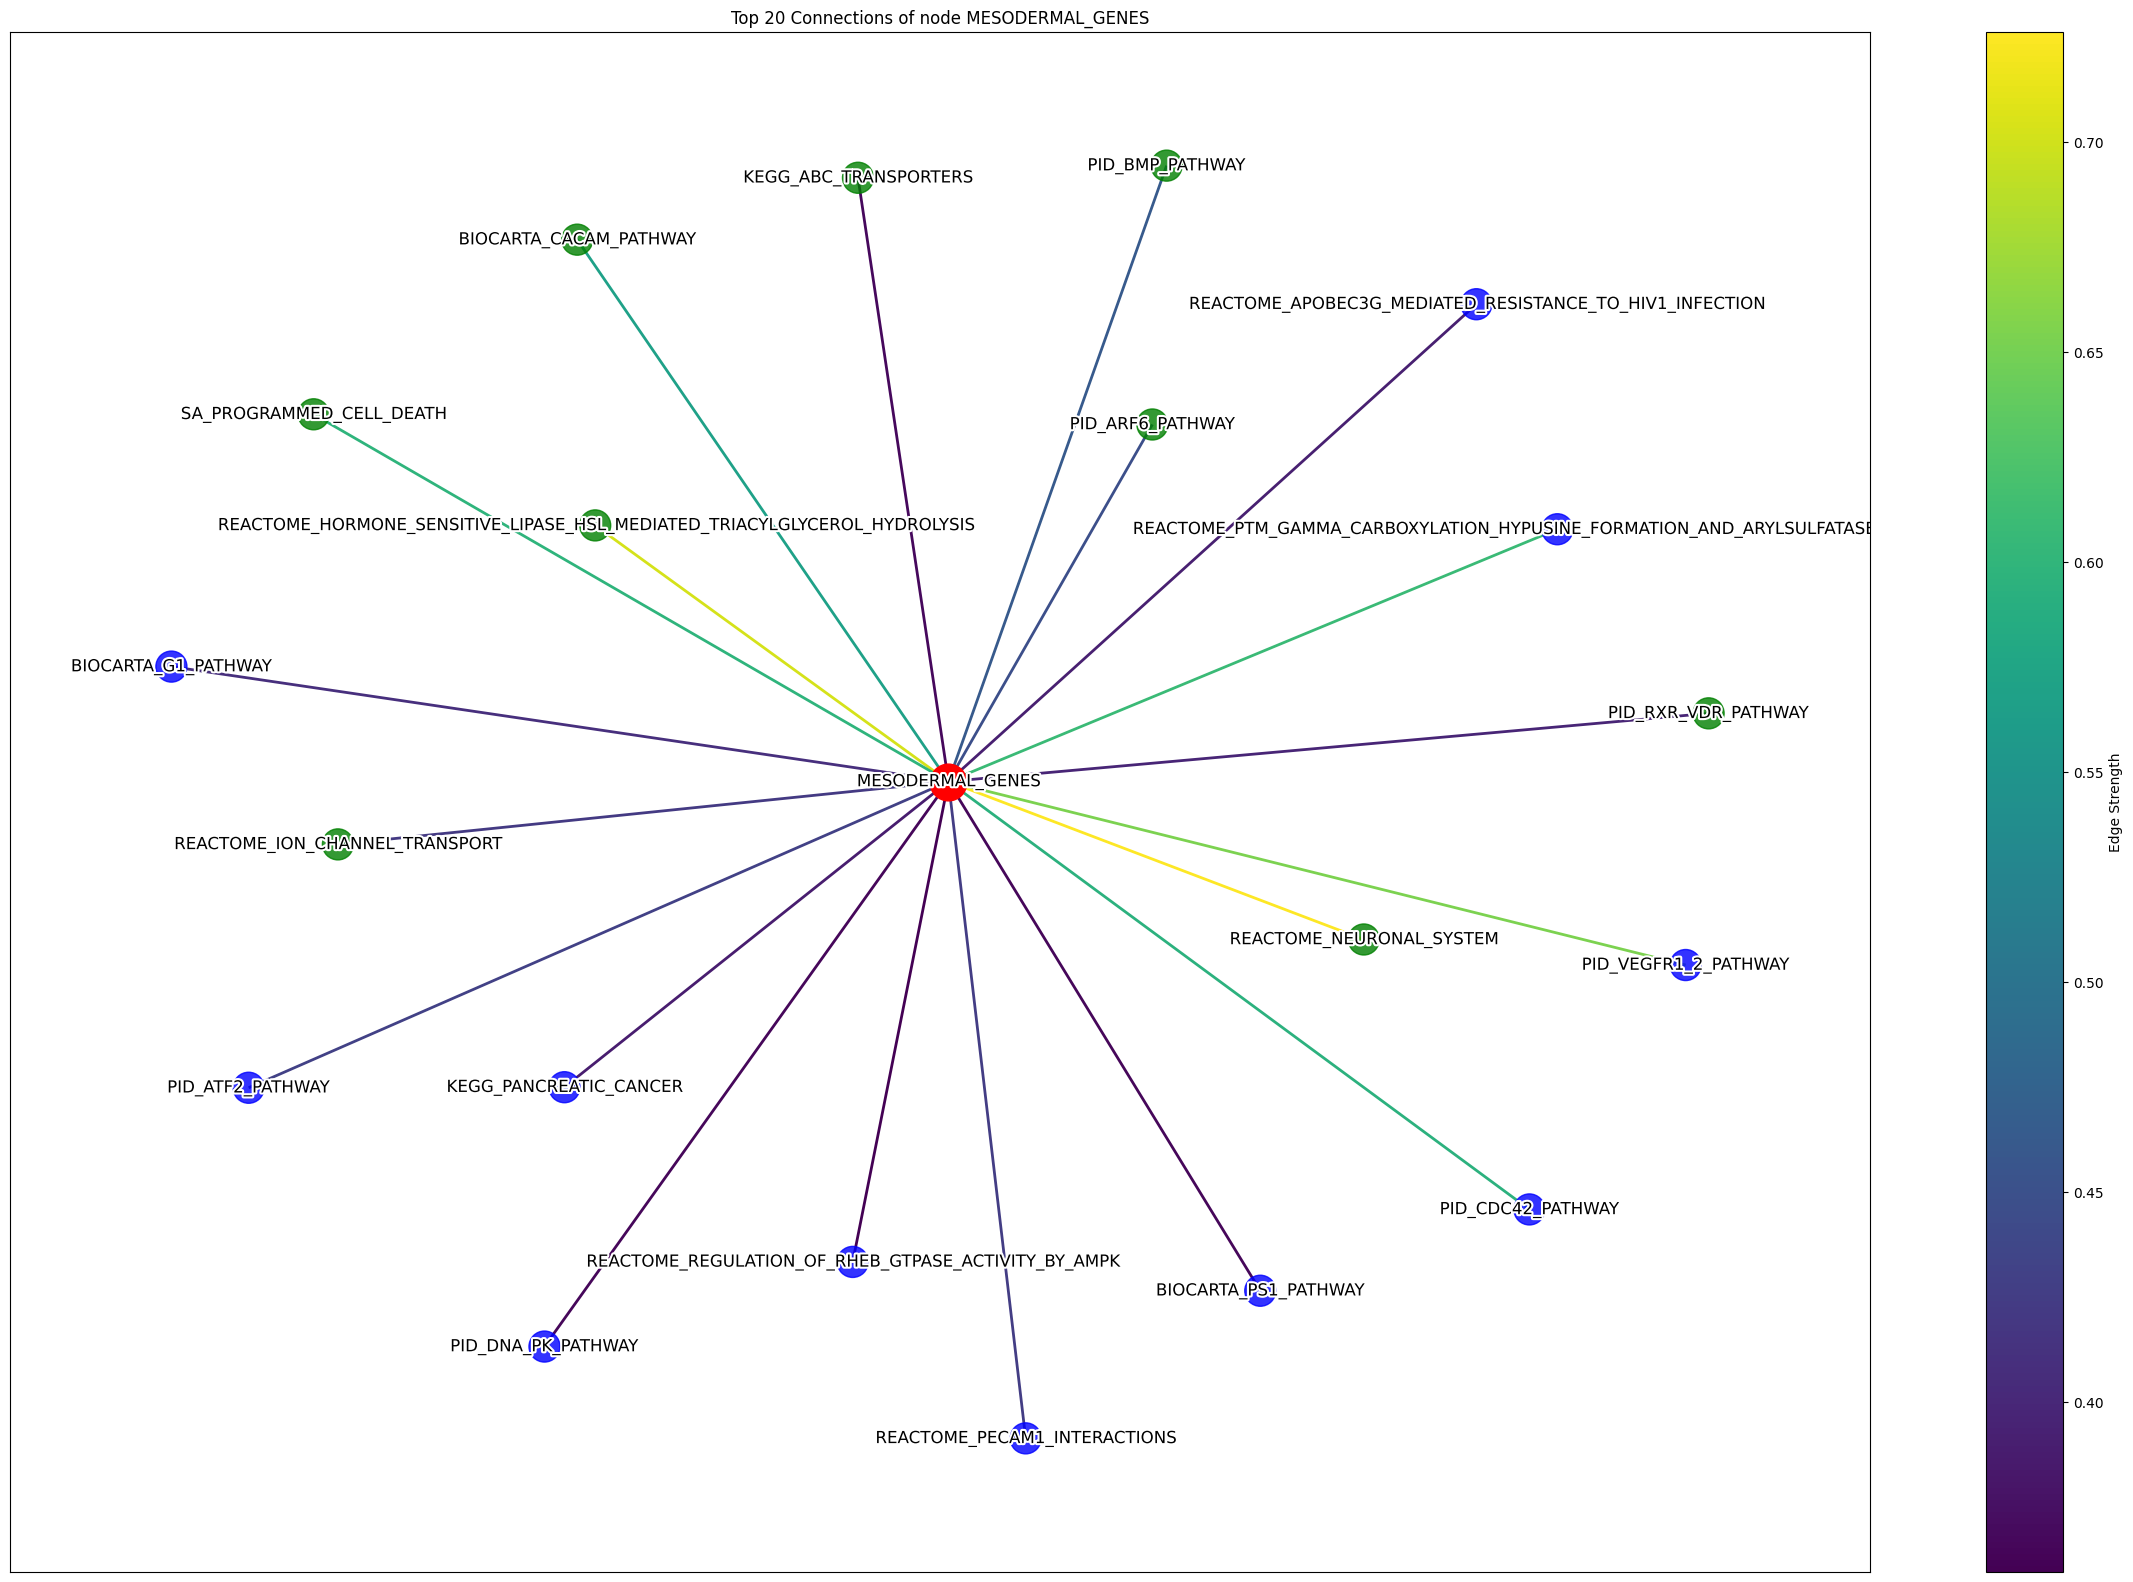

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import patheffects
import pandas as pd

# Load the data from the provided Excel file
file_path = '/content/Meso_with_strength_correlation.xlsx'
df = pd.read_excel(file_path)

# Create the graph from the dataframe
G = nx.from_pandas_edgelist(df, source='from', target='to', edge_attr=['strength', 'Values'])

# Choose the node to focus on
focus_node = 'MESODERMAL_GENES'

# Get all nodes directly connected to the focus node with their edge strengths and values
edges = [(focus_node, neighbor, G[focus_node][neighbor]['strength'], G[focus_node][neighbor]['Values']) for neighbor in G.neighbors(focus_node)]

# Sort edges by strength and keep only the top 20
top_edges = sorted(edges, key=lambda x: x[2], reverse=True)[:20]

# Extract the top 20 neighbors
top_neighbors = [edge[1] for edge in top_edges]

# Create a subgraph containing the focus node and its top 20 neighbors
subgraph = nx.Graph()
subgraph.add_node(focus_node)
for edge in top_edges:
    subgraph.add_edge(edge[0], edge[1], strength=edge[2], values=edge[3])

# Use spring layout for positions
pos = nx.spring_layout(subgraph)

# Redraw the graph with edges colored by strength and nodes colored by values
plt.figure(figsize=(30, 20))

# Draw nodes with colors based on values
node_colors = []
for node in subgraph.nodes():
    if node == focus_node:
        node_colors.append('red')  # Focus node color
    else:
        # Get the value attribute for the node
        node_value = next((G[focus_node][neighbor]['Values'] for neighbor in G.neighbors(focus_node) if neighbor == node), None)
        if node_value is not None:
            color = 'blue' if node_value > 0 else 'green'
        else:
            color = 'lightblue'
        node_colors.append(color)

nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_nodes(subgraph, pos, nodelist=[focus_node], node_color='red', node_size=700, alpha=1.0)

# Draw edges with edge colors based on strength
edge_colors = [subgraph[u][v]['strength'] for u, v in subgraph.edges()]
nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), edge_color=edge_colors, edge_cmap=plt.cm.viridis, width=2)

# Draw labels with outline to improve readability
labels = nx.draw_networkx_labels(subgraph, pos, font_size=12, font_family='sans-serif')
for t in labels.values():
    t.set_path_effects([patheffects.Stroke(linewidth=3, foreground='white'), patheffects.Normal()])

# Add color bar for edge strength
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Edge Strength')

plt.title(f"Top 20 Connections of node {focus_node}")

plt.show()


<ipython-input-24-3696038a2321>:70: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


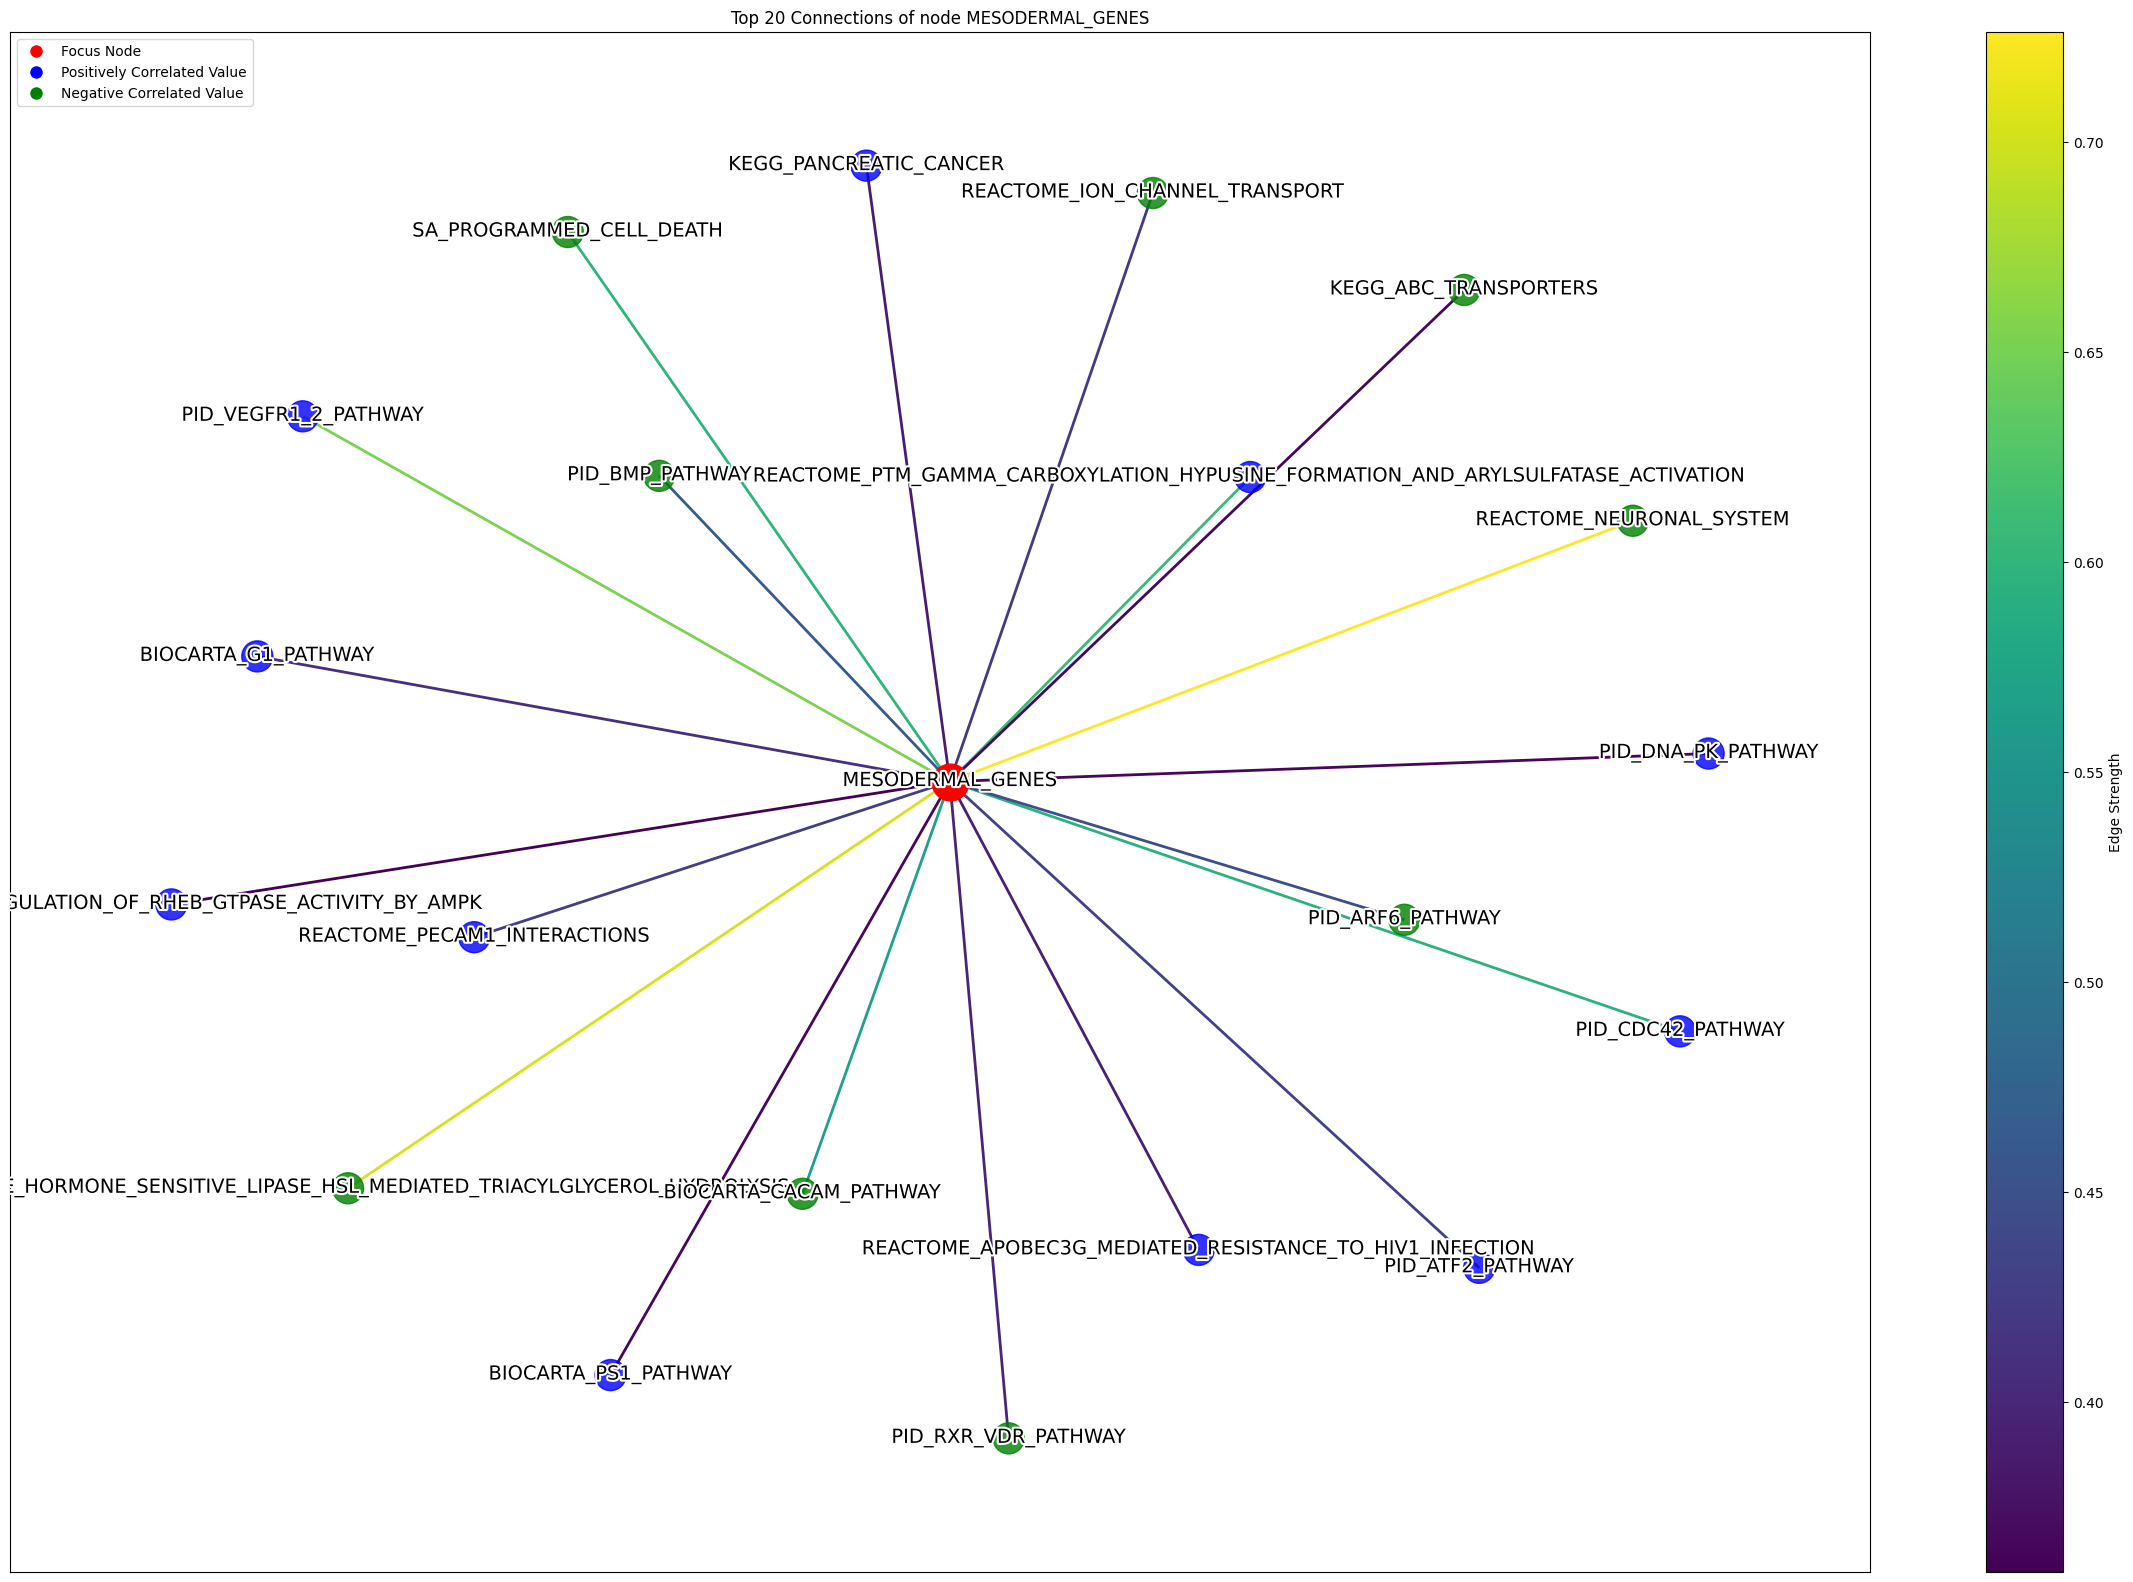

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import patheffects
import pandas as pd

# Load the data from the provided Excel file
file_path = '/content/Meso_with_strength_correlation.xlsx'
df = pd.read_excel(file_path)

# Create the graph from the dataframe
G = nx.from_pandas_edgelist(df, source='from', target='to', edge_attr=['strength', 'Values'])

# Choose the node to focus on
focus_node = 'MESODERMAL_GENES'

# Get all nodes directly connected to the focus node with their edge strengths and values
edges = [(focus_node, neighbor, G[focus_node][neighbor]['strength'], G[focus_node][neighbor]['Values']) for neighbor in G.neighbors(focus_node)]

# Sort edges by strength and keep only the top 20
top_edges = sorted(edges, key=lambda x: x[2], reverse=True)[:20]

# Extract the top 20 neighbors
top_neighbors = [edge[1] for edge in top_edges]

# Create a subgraph containing the focus node and its top 20 neighbors
subgraph = nx.Graph()
subgraph.add_node(focus_node)
for edge in top_edges:
    subgraph.add_edge(edge[0], edge[1], strength=edge[2], values=edge[3])

# Use spring layout for positions
pos = nx.spring_layout(subgraph, seed=42)

# Redraw the graph with edges colored by strength and nodes colored by values
plt.figure(figsize=(30, 20))

# Draw nodes with colors based on values
node_colors = []
node_labels = {}
for node in subgraph.nodes():
    if node == focus_node:
        node_colors.append('red')  # Focus node color
        node_labels[node] = 'Focus Node'
    else:
        # Get the value attribute for the node
        node_value = next((G[focus_node][neighbor]['Values'] for neighbor in G.neighbors(focus_node) if neighbor == node), None)
        if node_value is not None:
            color = 'blue' if node_value > 0 else 'green'
            node_labels[node] = f'Value: {node_value:.2f}'
        else:
            color = 'lightblue'
            node_labels[node] = 'No Value'
        node_colors.append(color)

nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=500, alpha=0.8)
nx.draw_networkx_nodes(subgraph, pos, nodelist=[focus_node], node_color='red', node_size=700, alpha=1.0)

# Draw edges with edge colors based on strength
edge_colors = [subgraph[u][v]['strength'] for u, v in subgraph.edges()]
nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), edge_color=edge_colors, edge_cmap=plt.cm.viridis, width=2)

# Draw labels with outline to improve readability
labels = nx.draw_networkx_labels(subgraph, pos, font_size=14, font_family='sans-serif')
for t in labels.values():
    t.set_path_effects([patheffects.Stroke(linewidth=3, foreground='white'), patheffects.Normal()])

# Add color bar for edge strength
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Edge Strength')

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Focus Node', markersize=10, markerfacecolor='red'),
                   Line2D([0], [0], marker='o', color='w', label='Positively Correlated Value', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Negative Correlated Value', markersize=10, markerfacecolor='green'),
                   ]

plt.legend(handles=legend_elements, loc='upper left')

plt.title(f"Top 20 Connections of node {focus_node}")

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/mnt/data/Meso_with_strength_correlation.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Sort the dataframe by 'strength' in descending order and select the top 20 values
top_20_df = df.sort_values(by='strength', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_20_df['from'], top_20_df['strength'], color='skyblue')
plt.xlabel('Strength')
plt.title('Top 20 Mesoderm Strength Values')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Adding the 'Values' on the plot
for index, value in enumerate(top_20_df['Values']):
    plt.text(top_20_df['strength'].iloc[index], index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()
